#  Beta Calculator 
## Author : Avnit Bambah
### Date : 03/12/2018
###### Learning ML with python 3 on Pluralsight.
###### Predicting stock beta 

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np 
from pandas_datareader import data
import googlefinance
import matplotlib.pyplot as plt

# do ploting inline instead of seperate windows 
%matplotlib inline

In [2]:
# add new stocks to the csv file 
df = pd.read_csv("data/holdings-xlk.csv")

In [3]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index in addition to the one in the csv file 
tickers = ['AAPL', 'MSFT', 'SPY','CME','GOOG','VVI','agg']
# get the symbols and add them to the list 
symbols = df.iloc[:,[0]]
array = symbols.values.tolist()
for i in range(1 , len(array)):
    tickers.append(str(array[i]).replace('[\'', '').replace('\']',''))
tickers

['AAPL',
 'MSFT',
 'SPY',
 'CME',
 'GOOG',
 'VVI',
 'agg',
 'BETR',
 'BUFF',
 'CALM',
 'CENT',
 'DTEA',
 'FRPT',
 'KHC',
 'LANC',
 'LWAY',
 'NUTR',
 'PF',
 'POST',
 'PPC',
 'RELV',
 'RIBT',
 'SAFM',
 'TOF',
 'WILC',
 'WWAV']

In [41]:

# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2000 until 12/31/2018.
start_date = '2000-01-01'
end_date = '2018-03-24'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
try:
    panel_data = data.DataReader(tickers, data_source, start_date, end_date)
except:
    print('error in the symbol')
#del panel_data["2017-01-02"]

# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data.loc['Adj Close']

close.dropna(axis=0, how='any')

# Getting all weekdays between start date and end date 
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

close_onedayold = close.shift(-1)
close_onedayold.head(10)

close_final = ((close / close_onedayold) -1) * 100


/Users/avnitbambah/anaconda3/lib/python3.6/site-packages/pandas_datareader/yahoo/daily.py:136: SymbolWarning: Failed to read symbol: 'NUTR', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/avnitbambah/anaconda3/lib/python3.6/site-packages/pandas_datareader/yahoo/daily.py:136: SymbolWarning: Failed to read symbol: 'TOF', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/avnitbambah/anaconda3/lib/python3.6/site-packages/pandas_datareader/yahoo/daily.py:136: SymbolWarning: Failed to read symbol: 'WWAV', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [42]:
close_onedayold.head(10)

,AAPL,BETR,BUFF,CALM,CENT,CME,DTEA,FRPT,GOOG,KHC,...,PPC,RELV,RIBT,SAFM,SPY,TOF,VVI,WILC,WWAV,agg
2000-01-03,2.478144,NaN,NaN,0.604914,3.286890,NaN,NaN,NaN,NaN,NaN,...,5.446455,4.250875,NaN,4.003366,99.349930,NaN,NaN,NaN,NaN,NaN
2000-01-04,2.514410,NaN,NaN,0.604914,3.265820,NaN,NaN,NaN,NaN,NaN,...,5.504705,4.000824,NaN,4.367311,99.527641,NaN,NaN,NaN,NaN,NaN
2000-01-05,2.296816,NaN,NaN,0.626911,3.286890,NaN,NaN,NaN,NaN,NaN,...,5.825084,4.000824,NaN,4.124682,97.928093,NaN,NaN,NaN,NaN,NaN
2000-01-06,2.405613,NaN,NaN,0.626911,3.286890,NaN,NaN,NaN,NaN,NaN,...,5.970712,3.875598,NaN,4.245998,103.615379,NaN,NaN,NaN,NaN,NaN
2000-01-07,2.363304,NaN,NaN,0.626911,3.202610,NaN,NaN,NaN,NaN,NaN,...,5.504705,3.875598,NaN,4.124682,103.970871,NaN,NaN,NaN,NaN,NaN
2000-01-10,2.242418,NaN,NaN,0.615912,3.244750,NaN,NaN,NaN,NaN,NaN,...,5.533829,4.250875,NaN,4.245998,102.726746,NaN,NaN,NaN,NaN,NaN
2000-01-11,2.107934,NaN,NaN,0.615912,3.329029,NaN,NaN,NaN,NaN,NaN,...,5.533829,5.251082,NaN,3.912383,101.704826,NaN,NaN,NaN,NaN,NaN
2000-01-12,2.339126,NaN,NaN,0.615912,3.329029,NaN,NaN,NaN,NaN,NaN,...,5.970712,5.001029,NaN,3.980611,103.082207,NaN,NaN,NaN,NaN,NaN
2000-01-13,2.428280,NaN,NaN,0.621403,3.202610,NaN,NaN,NaN,NaN,NaN,...,6.087214,5.625959,NaN,4.306655,104.481773,NaN,NaN,NaN,NaN,NaN
2000-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
close.head(10)

,AAPL,BETR,BUFF,CALM,CENT,CME,DTEA,FRPT,GOOG,KHC,...,PPC,RELV,RIBT,SAFM,SPY,TOF,VVI,WILC,WWAV,agg
2000-01-03,2.706315,NaN,NaN,0.637909,3.413309,NaN,NaN,NaN,NaN,NaN,...,5.883336,4.125650,NaN,4.245998,103.393242,NaN,NaN,NaN,NaN,NaN
2000-01-04,2.478144,NaN,NaN,0.604914,3.286890,NaN,NaN,NaN,NaN,NaN,...,5.446455,4.250875,NaN,4.003366,99.349930,NaN,NaN,NaN,NaN,NaN
2000-01-05,2.514410,NaN,NaN,0.604914,3.265820,NaN,NaN,NaN,NaN,NaN,...,5.504705,4.000824,NaN,4.367311,99.527641,NaN,NaN,NaN,NaN,NaN
2000-01-06,2.296816,NaN,NaN,0.626911,3.286890,NaN,NaN,NaN,NaN,NaN,...,5.825084,4.000824,NaN,4.124682,97.928093,NaN,NaN,NaN,NaN,NaN
2000-01-07,2.405613,NaN,NaN,0.626911,3.286890,NaN,NaN,NaN,NaN,NaN,...,5.970712,3.875598,NaN,4.245998,103.615379,NaN,NaN,NaN,NaN,NaN
2000-01-10,2.363304,NaN,NaN,0.626911,3.202610,NaN,NaN,NaN,NaN,NaN,...,5.504705,3.875598,NaN,4.124682,103.970871,NaN,NaN,NaN,NaN,NaN
2000-01-11,2.242418,NaN,NaN,0.615912,3.244750,NaN,NaN,NaN,NaN,NaN,...,5.533829,4.250875,NaN,4.245998,102.726746,NaN,NaN,NaN,NaN,NaN
2000-01-12,2.107934,NaN,NaN,0.615912,3.329029,NaN,NaN,NaN,NaN,NaN,...,5.533829,5.251082,NaN,3.912383,101.704826,NaN,NaN,NaN,NaN,NaN
2000-01-13,2.339126,NaN,NaN,0.615912,3.329029,NaN,NaN,NaN,NaN,NaN,...,5.970712,5.001029,NaN,3.980611,103.082207,NaN,NaN,NaN,NaN,NaN
2000-01-14,2.428280,NaN,NaN,0.621403,3.202610,NaN,NaN,NaN,NaN,NaN,...,6.087214,5.625959,NaN,4.306655,104.481773,NaN,NaN,NaN,NaN,NaN


In [44]:
close_final.head(10)

,AAPL,BETR,BUFF,CALM,CENT,CME,DTEA,FRPT,GOOG,KHC,...,PPC,RELV,RIBT,SAFM,SPY,TOF,VVI,WILC,WWAV,agg
2000-01-03,9.207334,NaN,NaN,5.454494,3.846159,NaN,NaN,NaN,NaN,NaN,...,8.021383,-2.945864,NaN,6.060700,4.069768,NaN,NaN,NaN,NaN,NaN
2000-01-04,-1.442326,NaN,NaN,0.000000,0.645167,NaN,NaN,NaN,NaN,NaN,...,-1.058186,6.249988,NaN,-8.333389,-0.178554,NaN,NaN,NaN,NaN,NaN
2000-01-05,9.473724,NaN,NaN,-3.508792,-0.641031,NaN,NaN,NaN,NaN,NaN,...,-5.499989,0.000000,NaN,5.882369,1.633390,NaN,NaN,NaN,NaN,NaN
2000-01-06,-4.522631,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,-2.439039,3.231140,NaN,-2.857185,-5.488844,NaN,NaN,NaN,NaN,NaN
2000-01-07,1.790248,NaN,NaN,0.000000,2.631604,NaN,NaN,NaN,NaN,NaN,...,8.465613,0.000000,NaN,2.941221,-0.341915,NaN,NaN,NaN,NaN,NaN
2000-01-10,5.390877,NaN,NaN,1.785807,-1.298713,NaN,NaN,NaN,NaN,NaN,...,-0.526290,-8.828229,NaN,-2.857185,1.211101,NaN,NaN,NaN,NaN,NaN
2000-01-11,6.379896,NaN,NaN,0.000000,-2.531639,NaN,NaN,NaN,NaN,NaN,...,0.000000,-19.047636,NaN,8.527156,1.004790,NaN,NaN,NaN,NaN,NaN
2000-01-12,-9.883692,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,-7.317101,5.000031,NaN,-1.714008,-1.336197,NaN,NaN,NaN,NaN,NaN
2000-01-13,-3.671488,NaN,NaN,-0.883646,3.947374,NaN,NaN,NaN,NaN,NaN,...,-1.913880,-11.107973,NaN,-7.570702,-1.339531,NaN,NaN,NaN,NaN,NaN
2000-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
covar = close_final.cov()

covar.head(10)

,AAPL,BETR,BUFF,CALM,CENT,CME,DTEA,FRPT,GOOG,KHC,...,PPC,RELV,RIBT,SAFM,SPY,TOF,VVI,WILC,WWAV,agg
AAPL,8.895495,0.578006,0.441937,1.264006,1.455844,1.694867,0.154084,0.897254,1.836266,0.682035,...,1.098257,0.050837,0.508248,1.075730,1.623106,NaN,1.436867,-4.072703,NaN,-0.059988
BETR,0.578006,13.049084,1.724265,0.673226,0.774846,0.385839,0.900242,1.274864,0.475736,0.420337,...,0.827826,1.496544,-0.184863,0.628844,0.683926,NaN,0.496773,NaN,NaN,0.010206
BUFF,0.441937,1.724265,4.810366,0.677561,1.030790,0.451542,0.754770,1.571576,0.453654,0.606145,...,0.775815,-0.154047,-0.066875,0.730149,0.571134,NaN,0.489106,-1.036798,NaN,-0.012794
CALM,1.264006,0.673226,0.677561,8.314661,1.155322,1.489070,0.707045,0.577692,1.120575,0.575955,...,1.965127,0.454707,1.178936,1.308868,0.951023,NaN,1.658525,0.073846,NaN,-0.020696
CENT,1.455844,0.774846,1.030790,1.155322,9.922016,1.747228,0.451489,1.034990,1.403338,0.785943,...,1.042613,0.555477,1.180167,1.086711,1.372155,NaN,2.336784,-1.503545,NaN,-0.044425
CME,1.694867,0.385839,0.451542,1.489070,1.747228,5.369265,0.251257,0.428709,1.800073,0.432083,...,2.034710,0.561485,1.010398,1.436096,1.596907,NaN,1.986680,-0.768186,NaN,-0.125832
DTEA,0.154084,0.900242,0.754770,0.707045,0.451489,0.251257,22.477646,0.846963,0.130118,0.471617,...,1.129738,0.008399,-0.534185,0.627799,0.356360,NaN,0.467363,2.951310,NaN,0.018272
FRPT,0.897254,1.274864,1.571576,0.577692,1.034990,0.428709,0.846963,10.491278,0.490234,0.897895,...,0.846426,-0.225623,0.576959,0.597092,0.642696,NaN,0.645580,-2.743662,NaN,-0.037451
GOOG,1.836266,0.475736,0.453654,1.120575,1.403338,1.800073,0.130118,0.490234,3.621130,0.754626,...,1.003766,0.260870,0.373841,0.882783,1.277741,NaN,1.370079,-1.270653,NaN,-0.024299
KHC,0.682035,0.420337,0.606145,0.575955,0.785943,0.432083,0.471617,0.897895,0.754626,1.638744,...,0.809656,0.160541,-0.301475,0.658950,0.591592,NaN,0.439923,-1.357823,NaN,0.008824


In [46]:
market_temp = close_final.iloc[:,[20]]
market = market_temp.dropna()


In [47]:
#total = sum(market)
mean_value = pd.DataFrame.mean(market)
print(mean_value)
variance = pd.DataFrame.var(market)
print(variance)
market.head(10)

SPY   -0.011492
dtype: float64
SPY    1.480824
dtype: float64


,SPY
2000-01-03,4.069768
2000-01-04,-0.178554
2000-01-05,1.633390
2000-01-06,-5.488844
2000-01-07,-0.341915
2000-01-10,1.211101
2000-01-11,1.004790
2000-01-12,-1.336197
2000-01-13,-1.339531
2000-01-18,-0.807844


In [48]:
covartotal = pd.DataFrame.sum(covar)
print(covartotal)
print(variance[[0][0]])


AAPL    24.623828
BETR    26.986567
BUFF    16.812453
CALM    28.138761
CENT    31.026041
CME     26.674849
DTEA    34.010689
FRPT    22.516264
GOOG    20.357582
KHC     12.087360
LANC    15.664106
LWAY    24.102763
MSFT    20.212742
NUTR     0.000000
PF       5.824655
POST    11.109943
PPC     67.005785
RELV    39.625424
RIBT    49.511365
SAFM    30.833337
SPY     18.832532
TOF      0.000000
VVI     30.889375
WILC    -4.233405
WWAV     0.000000
agg     -0.349838
dtype: float64
1.48082445212


In [49]:
beta_appl = (covartotal/(variance[[0][0]] ** 2 ))


In [51]:
beta_appl.head(100)

AAPL    11.229190
BETR    12.306668
BUFF     7.666973
CALM    12.832102
CENT    14.148787
CME     12.164516
DTEA    15.509874
FRPT    10.268078
GOOG     9.283656
KHC      5.512191
LANC     7.143293
LWAY    10.991569
MSFT     9.217605
NUTR     0.000000
PF       2.656214
POST     5.066461
PPC     30.556608
RELV    18.070359
RIBT    22.578638
SAFM    14.060908
SPY      8.588188
TOF      0.000000
VVI     14.086463
WILC    -1.930557
WWAV     0.000000
agg     -0.159537
dtype: float64

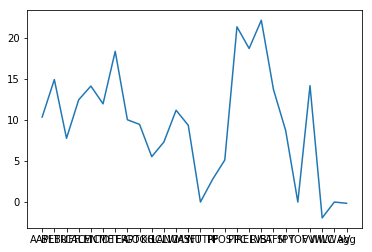

In [38]:
plt.plot(beta_appl)